# Exploratory Data Analysis

In deze notebook heb ik wat code geschreven om een overzicht te krijgen van de data.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

### Calendar
`calendar_afcs2020.csv`

Contains information about the dates on which the products are sold.

* __Date + month + year + d__ = datum
* __wm_yr_wk__ = jaar, week (koppelen met sell prices dataset)
* __Weekday & wday__ = weekdag (sat:1, sun:2, mon:3, tue:4, wed:5, thu:6, fri:7)
* __event_type & event_name__ = feestdagen
* __snap_CA__ = boolean(0,1), iets met kortingsbonnen

In [148]:
calendar = pd.read_csv("data/calendar_afcs2020.csv")
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA
0,1/29/2011,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0
1,1/30/2011,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0
2,1/31/2011,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0
3,2/1/2011,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1
4,2/2/2011,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1


In [143]:
calendar.iloc[1913]

date            4/25/2016
wm_yr_wk            11613
weekday            Monday
wday                    3
month                   4
year                 2016
d                  d_1914
event_name_1          NaN
event_type_1          NaN
event_name_2          NaN
event_type_2          NaN
snap_CA                 0
Name: 1913, dtype: object

In [138]:
calendar["event_type_1"].value_counts()

Religious    55
National     52
Cultural     37
Sporting     18
Name: event_type_1, dtype: int64

In [147]:
calendar[calendar["event_type_1"]=="Sporting"]["event_name_1"].unique()

array(['SuperBowl', 'NBAFinalsStart', 'NBAFinalsEnd'], dtype=object)

In [4]:
calendar["event_name_1"].unique()

array([nan, 'SuperBowl', 'ValentinesDay', 'PresidentsDay', 'LentStart',
       'LentWeek2', 'StPatricksDay', 'Purim End', 'OrthodoxEaster',
       'Pesach End', 'Cinco De Mayo', "Mother's day", 'MemorialDay',
       'NBAFinalsStart', 'NBAFinalsEnd', "Father's day",
       'IndependenceDay', 'Ramadan starts', 'Eid al-Fitr', 'LaborDay',
       'ColumbusDay', 'Halloween', 'EidAlAdha', 'VeteransDay',
       'Thanksgiving', 'Christmas', 'Chanukah End', 'NewYear',
       'OrthodoxChristmas', 'MartinLutherKingDay', 'Easter'], dtype=object)

In [139]:
calendar["event_type_2"].value_counts()

Cultural     4
Religious    1
Name: event_type_2, dtype: int64

In [6]:
calendar["event_name_2"].unique()

array([nan, 'Easter', 'Cinco De Mayo', 'OrthodoxEaster', "Father's day"],
      dtype=object)

In [7]:
print("Boolean options:", calendar["snap_CA"].unique(), "\nMean value:", calendar["snap_CA"].mean())

Boolean options: [0 1] 
Mean value: 0.33011681056373793


### Sell Prices
`sell_prices_afcs2020.csv`

Contains information about the price of the products sold by CA3 store and date.

* __store_id__ = de winkel, in dit geval altijd CA_3
* __item_id__ = product
* __wm_yr_wk__ = jaar, week (koppelen met calendar dataset)
* __sell_price__ = verkoopprijs product

In [78]:
prices = pd.read_csv("data/sell_prices_afcs2020.csv")
prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_3,HOBBIES_2_001,11105,5.47
1,CA_3,HOBBIES_2_001,11106,5.47
2,CA_3,HOBBIES_2_001,11107,5.47
3,CA_3,HOBBIES_2_001,11108,5.47
4,CA_3,HOBBIES_2_001,11109,5.47


In [135]:
df = prices[prices["item_id"] == "HOBBIES_2_020"]
df["day"] = [i for i in range(len(df["wm_yr_wk"]))]
df = df[["day","sell_price"]]
df

<ipython-input-135-9d6c7bdd09aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["day"] = [i for i in range(len(df["wm_yr_wk"]))]


,day,sell_price
4496,0,3.47
4497,1,3.47
4498,2,3.47
4499,3,3.47
4500,4,3.47
...,...,...
4773,277,3.88
4774,278,3.88
4775,279,3.88
4776,280,3.88


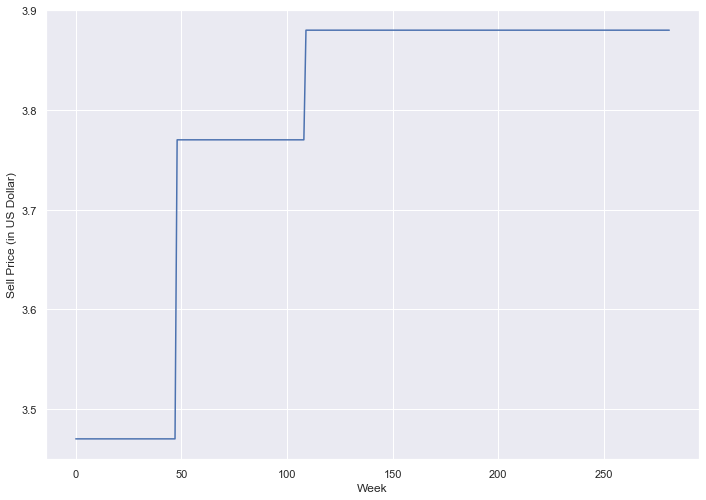

In [137]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.lineplot(data=df, x="day", y="sell_price")
ax.set(xlabel="Week", ylabel="Sell Price (in US Dollar)")
plt.show()

### Train Validation
`sales_train_validation_afcs2020.csv`

Contains the historical daily unit sales data per product by CA3 store [d_1 - d_1913]. This can be used as a training set for models.

In [11]:
train = pd.read_csv("data/sales_train_validation_afcs2020.csv")
train.head()

,id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_2_001_CA_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_2_002_CA_3_validation,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
2,HOBBIES_2_003_CA_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,3
3,HOBBIES_2_004_CA_3_validation,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,HOBBIES_2_005_CA_3_validation,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [17]:
train["id"].unique()

array(['HOBBIES_2_001_CA_3_validation', 'HOBBIES_2_002_CA_3_validation',
       'HOBBIES_2_003_CA_3_validation', 'HOBBIES_2_004_CA_3_validation',
       'HOBBIES_2_005_CA_3_validation', 'HOBBIES_2_006_CA_3_validation',
       'HOBBIES_2_007_CA_3_validation', 'HOBBIES_2_008_CA_3_validation',
       'HOBBIES_2_009_CA_3_validation', 'HOBBIES_2_010_CA_3_validation',
       'HOBBIES_2_011_CA_3_validation', 'HOBBIES_2_012_CA_3_validation',
       'HOBBIES_2_013_CA_3_validation', 'HOBBIES_2_014_CA_3_validation',
       'HOBBIES_2_015_CA_3_validation', 'HOBBIES_2_016_CA_3_validation',
       'HOBBIES_2_017_CA_3_validation', 'HOBBIES_2_018_CA_3_validation',
       'HOBBIES_2_019_CA_3_validation', 'HOBBIES_2_020_CA_3_validation',
       'HOBBIES_2_021_CA_3_validation', 'HOBBIES_2_022_CA_3_validation',
       'HOBBIES_2_023_CA_3_validation', 'HOBBIES_2_024_CA_3_validation',
       'HOBBIES_2_025_CA_3_validation', 'HOBBIES_2_026_CA_3_validation',
       'HOBBIES_2_027_CA_3_validation', 'HOBBIES_2_

In [68]:
product = train[train["id"]=="HOBBIES_2_083_CA_3_validation"]
product = product.set_index("id")
product.head()

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
id,,,,,,,,,,,,,,,,,,,,,
HOBBIES_2_083_CA_3_validation,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


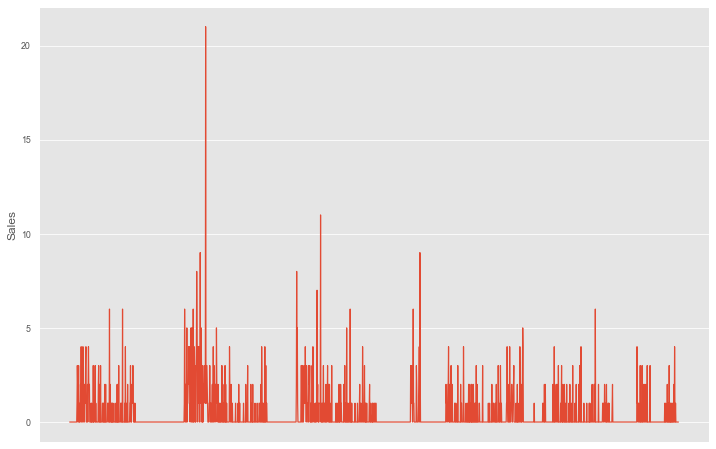

In [69]:
style.use("ggplot")

row = product.iloc[0]
row.plot(figsize=[12,8])

# axes
ax = plt.gca()
ax.axes.get_xaxis().set_visible(False)
plt.xlabel("Day")
plt.ylabel("Sales")

plt.show()

In [16]:
train2 = train.T
train2.describe()

,0,1,2,3,4,5,6,7,8,9,...,139,140,141,142,143,144,145,146,147,148
count,1914,1914,1914,1914,1914,1914,1914,1914,1914,1914,...,1914,1914,1914,1914,1914,1914,1914,1914,1914,1914
unique,6,6,7,7,4,5,11,5,9,5,...,9,9,29,13,9,10,11,10,9,11
top,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1730,1643,1196,1536,1789,1685,1414,1705,1385,1806,...,1583,1641,1181,1779,1696,1478,1421,1625,1619,1734


### Train Evaluation
`sales_train_evaluation_afcs2020.csv`

Complete dataset that includes sales [d_1 - d_1941] and serves to evaluate from [d_1914 - d_1941], 28 days of the complete training sample (sales_train_validation_afcs2020.cs).

In [12]:
val = pd.read_csv("data/sales_train_evaluation_afcs2020.csv")
val.head()

,id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_2_001_CA_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,HOBBIES_2_002_CA_3_validation,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,HOBBIES_2_003_CA_3_validation,0,0,0,0,0,0,0,0,0,...,1,0,4,1,0,3,0,1,2,2
3,HOBBIES_2_004_CA_3_validation,0,0,0,0,0,0,0,0,0,...,0,5,0,0,0,0,0,0,0,0
4,HOBBIES_2_005_CA_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Sample Submission
`sample_submission_afcs2020.csv`

The correct format for submissions. the evaluation rows, this corresponds to [d_1942 - d_1969], 28 forecast days (F1-F28).

* __Index__: id, producten in de winkel
* __Features__: 28 forecast dagen (F1 - F28)

In [13]:
sample = pd.read_csv("data/sample_submission_afcs2020.csv")
sample.head()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_2_001_CA_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_2_002_CA_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_2_003_CA_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_2_004_CA_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_2_005_CA_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
